# Decision tree based models

This week we will use the <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv'>vehincle coupon recommendation dataset</a>. Our goal is to classify people based on their driving habits whether they would accept a vehicle coupon or not.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## I. Prepare dataset

1.   Load the `in-vehicle-coupon-recommendation.csv` dataset
2.   Search for missing values and if needed, handle them!
3.   Encode the non numeric variables into numeric ones! For the binary
     features simply encode them as ($0$/$1$). Do not create two separate
     columns for them! You'll have to use the description of the dataset
     provided at its download location!

In [2]:
def value_integerizer(dataframe, column):
    col_name, _ = np.unique(dataframe[column].astype(str),return_counts=True)
    dataframe[column] = dataframe[column].replace(to_replace=col_name, value=([x for x in range(len(col_name))]))
    print(col_name, len(col_name))
    return dataframe

In [3]:
data = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

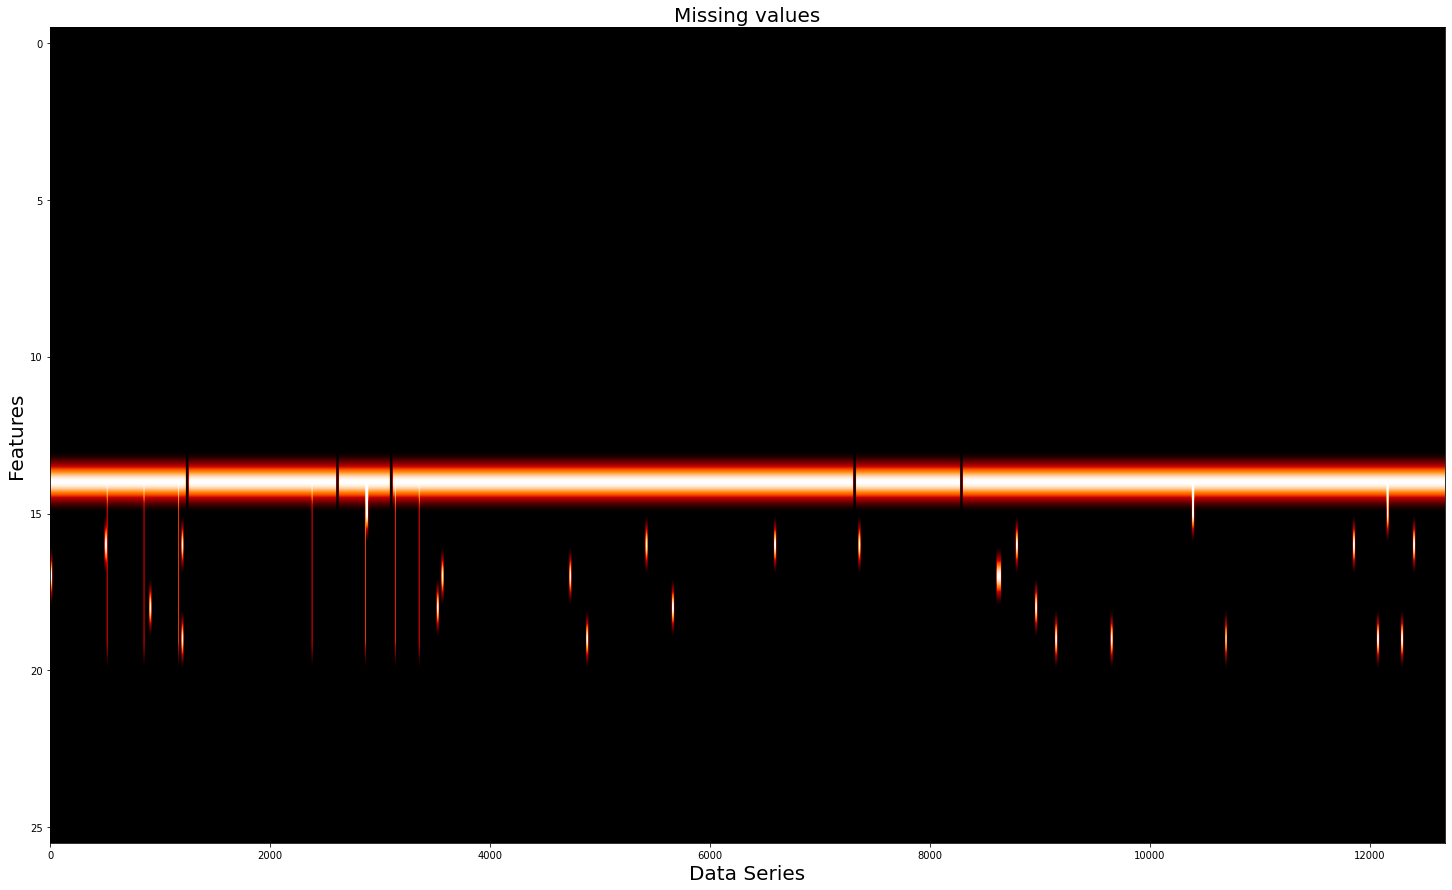

In [5]:
plt.figure(figsize=(25, 15))
plt.title('Missing values', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xlabel('Data Series', fontsize=20)
plt.imshow(data.isna().T, cmap='gist_heat',aspect='auto')

In [6]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

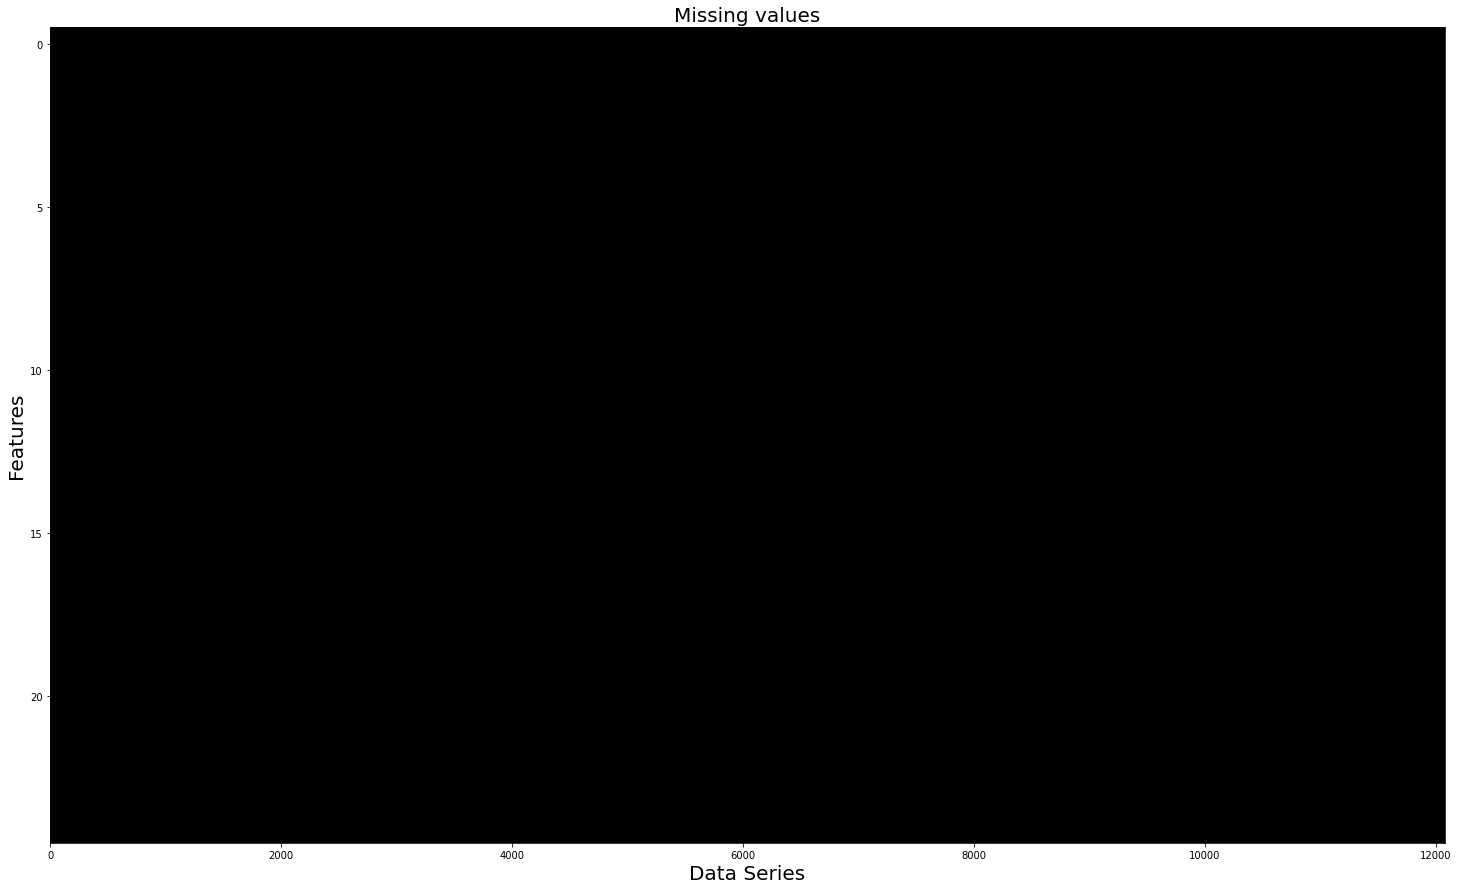

In [7]:
data = data.drop('car',axis=1)
data = data.dropna()
plt.figure(figsize=(25, 15))
plt.title('Missing values', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xlabel('Data Series', fontsize=20)
plt.imshow(data.isna().T, cmap='gist_heat',aspect='auto')

In [8]:
print(data.duplicated().sum())
data = data[~data.duplicated()]

72


In [9]:
print(data.duplicated().sum())
data.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-n

In [10]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [11]:
data_1 = data[data.describe().columns].copy()
data_2 = data[data.columns[~data.columns.isin(data.describe().columns)]].copy()

In [12]:
for col in data_2.columns:
    data_2 = value_integerizer(data_2,col)

['Home' 'No Urgent Place' 'Work'] 3
['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 4
['Rainy' 'Snowy' 'Sunny'] 3
['10AM' '10PM' '2PM' '6PM' '7AM'] 5
['Bar' 'Carry out & Take away' 'Coffee House' 'Restaurant(20-50)'
 'Restaurant(<20)'] 5
['1d' '2h'] 2
['Female' 'Male'] 2
['21' '26' '31' '36' '41' '46' '50plus' 'below21'] 8
['Divorced' 'Married partner' 'Single' 'Unmarried partner' 'Widowed'] 5
['Associates degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'High School Graduate'
 'Some High School' 'Some college - no degree'] 6
['Architecture & Engineering' 'Arts Design Entertainment Sports & Media'
 'Building & Grounds Cleaning & Maintenance' 'Business & Financial'
 'Community & Social Services' 'Computer & Mathematical'
 'Construction & Extraction' 'Education&Training&Library'
 'Farming Fishing & Forestry' 'Food Preparation & Serving Related'
 'Healthcare Practitioners & Technical' 'Healthcare Support'
 'Installation Maintenance & Repair' 'Legal'
 'Life Physical Social Sci

In [13]:
data = pd.concat([data_2, data_1],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12007 non-null  int64
 1   passanger             12007 non-null  int64
 2   weather               12007 non-null  int64
 3   time                  12007 non-null  int64
 4   coupon                12007 non-null  int64
 5   expiration            12007 non-null  int64
 6   gender                12007 non-null  int64
 7   age                   12007 non-null  int64
 8   maritalStatus         12007 non-null  int64
 9   education             12007 non-null  int64
 10  occupation            12007 non-null  int64
 11  income                12007 non-null  int64
 12  Bar                   12007 non-null  int64
 13  CoffeeHouse           12007 non-null  int64
 14  CarryAway             12007 non-null  int64
 15  RestaurantLessThan20  12007 non-null  int64
 16  Res

/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='coupon', ylabel='count'>

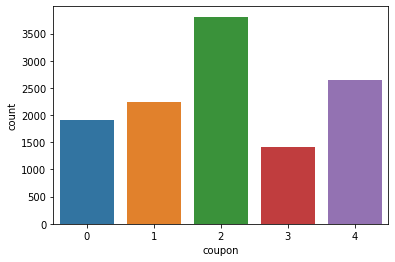

In [14]:
sns.countplot(data.coupon)

## II. Train & visualize decision tree classifier

1.   Train a **decision tree classifier** using the `sklearn` API
     -   Use its default parameters
     -   Use all the data
2.   Visualize the decision tree, with the *Gini impurities* also showing on the
     plot. The `plot_tree` function in `sklearn` will be really helpful. You
     may or may not need to tune its arguments to get a reasonable result.
3.   Manually check for the labels and for an arbitrary feature whether the
     returned *Gini impurities* are correct
4.   In a few sentences, discuss the results

In [15]:
scaled_data = pd.DataFrame(StandardScaler().fit_transform(data[data.columns[:-1]]),columns=data[data.columns[:-1]].columns)
Y = data[data.columns[-1]]

In [16]:
clf = DecisionTreeClassifier()
clf.fit(scaled_data,Y)

DecisionTreeClassifier()

[Text(884.08125, 1009.5428571428572, 'X[4] <= 1.072\n12007\n[5182, 6825]'),
 Text(446.4, 854.2285714285715, 'X[13] <= 0.915\n9361\n[4414, 4947]'),
 Text(223.2, 698.9142857142858, 'X[4] <= -1.154\n7147\n[3061, 4086]'),
 Text(111.6, 543.6, 'X[12] <= 0.569\n1459\n[834, 625]'),
 Text(55.8, 388.28571428571433, 'X[12] <= -0.075\n923\n[403, 520]'),
 Text(27.9, 232.97142857142865, 'X[1] <= 0.881\n476\n[155, 321]'),
 Text(13.95, 77.65714285714284, '\n  (...)  \n'),
 Text(41.849999999999994, 77.65714285714284, '\n  (...)  \n'),
 Text(83.69999999999999, 232.97142857142865, 'X[6] <= 0.026\n447\n[248, 199]'),
 Text(69.75, 77.65714285714284, '\n  (...)  \n'),
 Text(97.64999999999999, 77.65714285714284, '\n  (...)  \n'),
 Text(167.39999999999998, 388.28571428571433, 'X[8] <= -0.248\n536\n[431, 105]'),
 Text(139.5, 232.97142857142865, 'X[11] <= -1.133\n275\n[252, 23]'),
 Text(125.55, 77.65714285714284, '\n  (...)  \n'),
 Text(153.45, 77.65714285714284, '\n  (...)  \n'),
 Text(195.29999999999998, 232.9

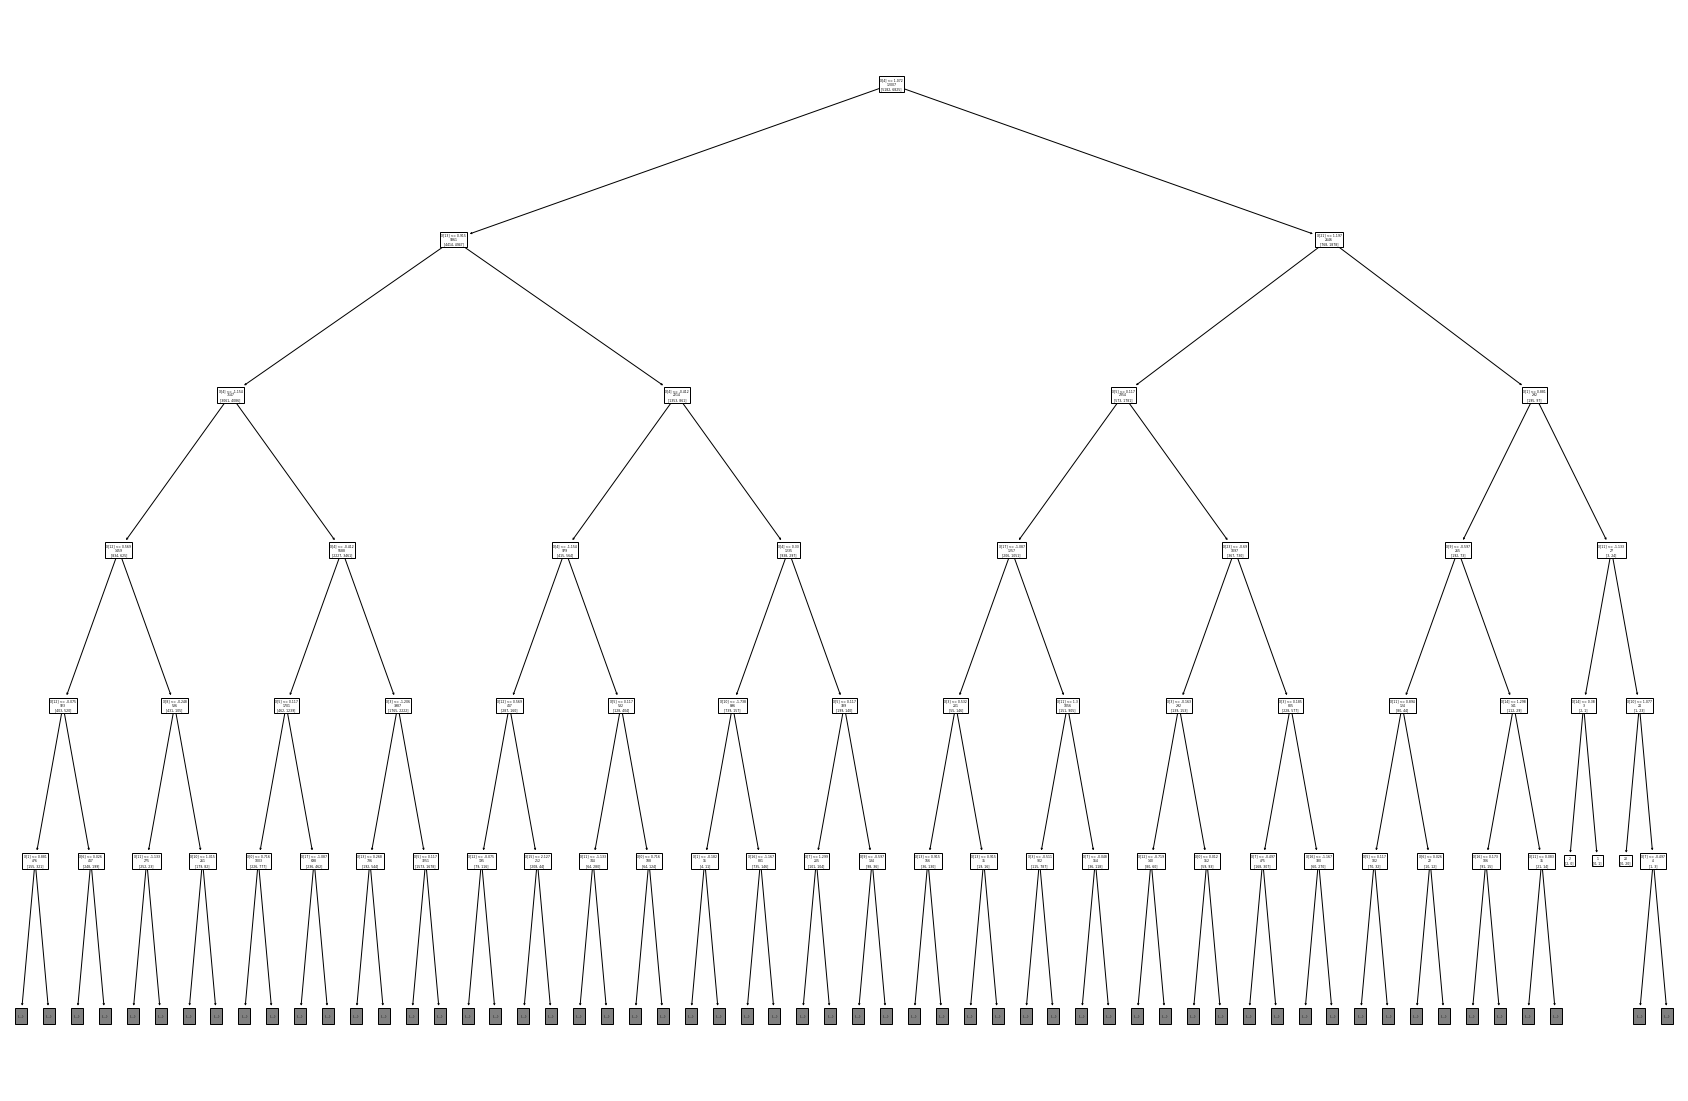

In [17]:
plt.figure(figsize=(30,20))
tree.plot_tree(clf,max_depth=5,impurity=False, label='None')

In [42]:
clf.feature_importances_

array([0.02383414, 0.03841775, 0.01756811, 0.04919854, 0.09837835,
       0.03142334, 0.02185225, 0.07648551, 0.03626486, 0.05165338,
       0.09154477, 0.08749813, 0.07283289, 0.06056225, 0.04437453,
       0.04249967, 0.04278335, 0.02568458, 0.01473744, 0.        ,
       0.02482528, 0.02377844, 0.0109063 , 0.01289613])

In [54]:
#plt.figure(figsize=(40,30))
#plt.spy(clf.decision_path(scaled_data))

https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/
#!pip install graphviz

In [51]:
import graphviz
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                      feature_names=data.columns[:-1],   
                      filled=True, rounded=True,  
                      special_characters=True,
                               max_depth=5,
                               leaves_parallel=False,
                               rotate=True)
graph = graphviz.Source(dot_data)  

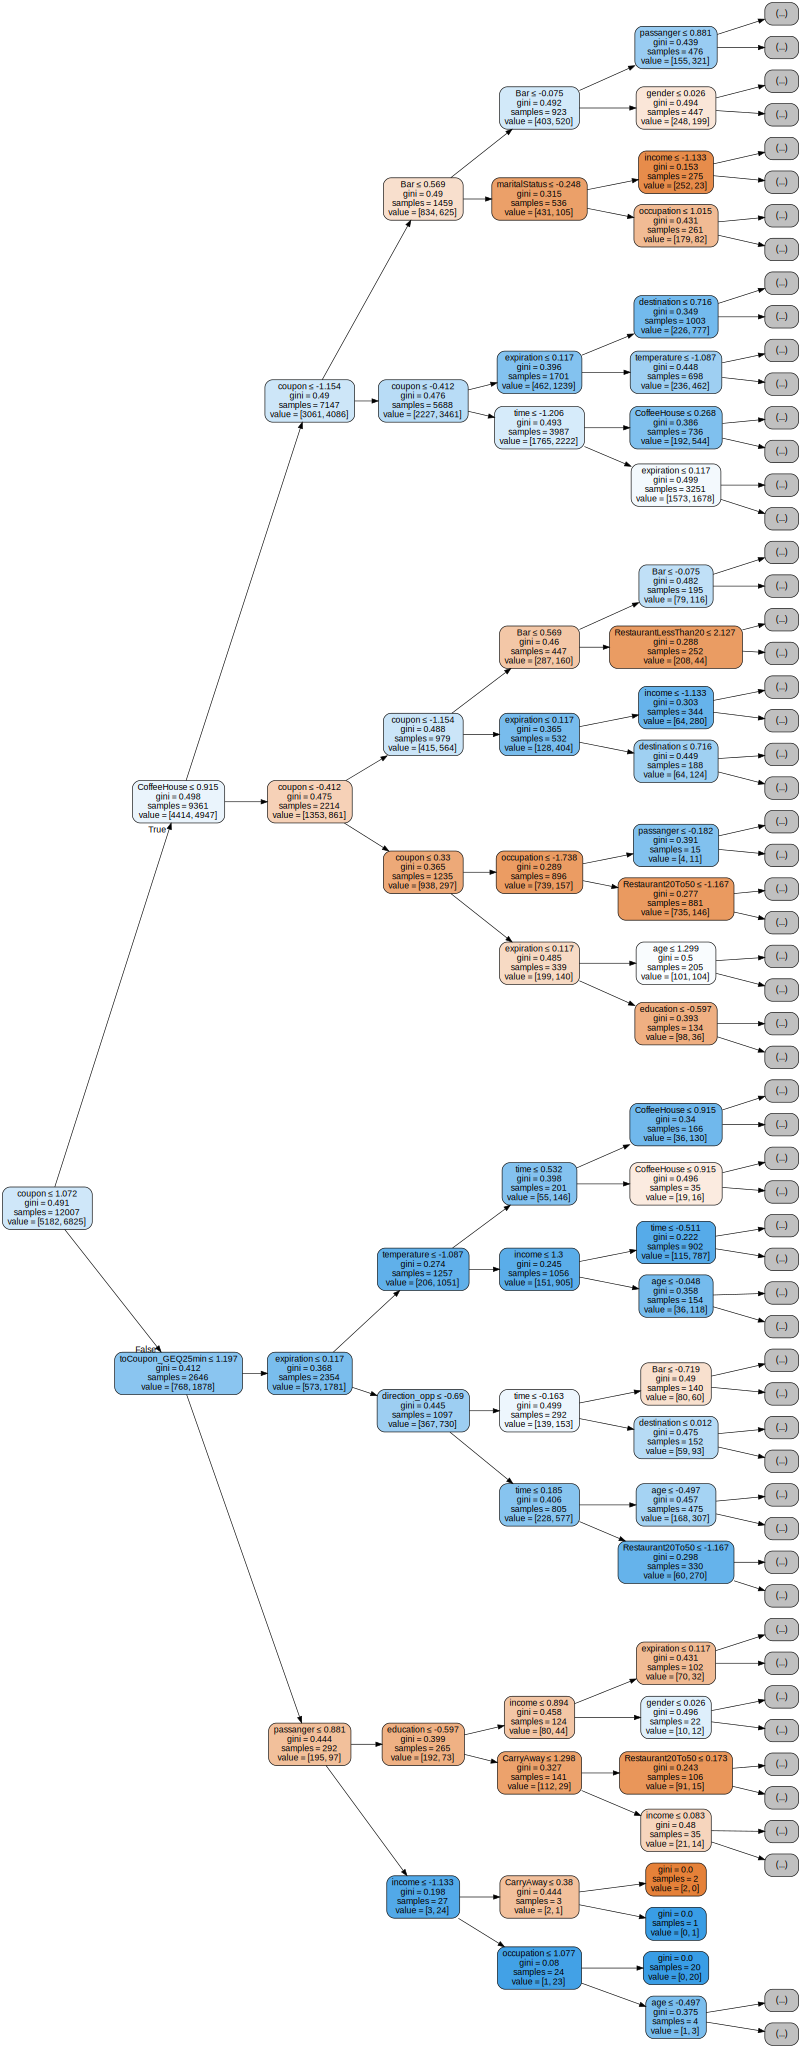

In [52]:
graph

In [53]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=list(data.columns[:-1]), show_weights=True)
print(r)

|--- coupon <= 1.07
|   |--- CoffeeHouse <= 0.91
|   |   |--- coupon <= -1.15
|   |   |   |--- Bar <= 0.57
|   |   |   |   |--- Bar <= -0.08
|   |   |   |   |   |--- passanger <= 0.88
|   |   |   |   |   |   |--- occupation <= -0.80
|   |   |   |   |   |   |   |--- income <= 0.49
|   |   |   |   |   |   |   |   |--- toCoupon_GEQ15min <= -0.12
|   |   |   |   |   |   |   |   |   |--- Restaurant20To50 <= -0.16
|   |   |   |   |   |   |   |   |   |   |--- maritalStatus <= -0.25
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 8.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- maritalStatus >  -0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Restaurant20To50 >  -0.16
|   |   |   |   |   |   |   |   |   |   |--- age <= 0.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- age >  0.40
|   |   |   |   |   |   |   |   |   |

In [21]:
ypred = clf.predict(scaled_data)

## III. Random forest feature importance

1.   Train a random forest classifier on all the data using the sklearn API
     -   Use default values again, but fix the `random_state` to $57$!
2.   Plot the importance values of the $10$ most important features
     -   Create a bar plot where the height of the bar is the feature importance
     -   The `feature_importances_` attribute is helpful

In [65]:
clf_3 = RandomForestClassifier(random_state=57)
clf_3.fit(scaled_data,Y)

RandomForestClassifier(random_state=57)

In [82]:
len(clf_3.feature_importances_)

24

In [87]:
clf_3.feature_importances_

array([0.02587903, 0.03505014, 0.02139827, 0.05768773, 0.11262294,
       0.03495838, 0.0249673 , 0.06522364, 0.04016829, 0.05025147,
       0.08641095, 0.07394477, 0.05040987, 0.065012  , 0.04814603,
       0.04507823, 0.04318161, 0.03669281, 0.02039295, 0.        ,
       0.02706022, 0.01334187, 0.01132708, 0.01079441])

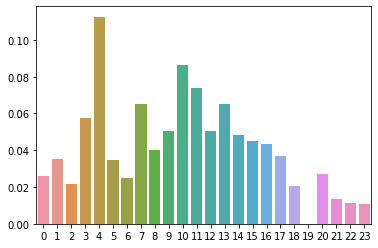

In [93]:
sns.barplot(x=np.arange(0,len(clf_3.feature_importances_),1),y=clf_3.feature_importances_)

## IV. Evaluation

1.   Generate prediction probabilities with a **decision tree** and with a
     **random forest model**
     -   Use $5$-fold cross validation for both models
     -   Use default parameters for both models
2.   Compare the two models with ROC curves
     -   Why does the shape of the decision tree's ROC curve looks different?

## V. Tuning model

1.   Using $80\%$ - $20\%$ train-test split generate predictions for a **random
     forest model**
     -   Set the `random_state` parameter for every run to $57$ for the
         train-test split and for the Random Forest Classifier as well!
2.   Plot the AUC as the function of the number of trees in the forest for both
     the traing and the test data!
3.   Do we experience overfitting if we use too many trees?

### Hints:

-   On total you can get $10$ points for fully completing all tasks.
-   Decorate your notebook with, questions, explanation etc., make it
    self-contained and understandable!
-   Comment your code when necessary
-   Write functions for repetitive tasks!
-   Use the `pandas` package for data loading and handling
-   Use `matplotlib` and `seaborn` for plotting or `bokeh` and `plotly` for
    interactive investigation.
-   Use the `scikit-learn` package for almost everything
-   Use for loops only if it is really necessary!
-   Code sharing is not allowed between student! Sharing code will
    result in zero points.
-   If you use code found on web, it is OK, **but, make its source clear**!